In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

/Users/threshavoddiboina/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Create a synthetic dataset
np.random.seed(42)

# Number of customers
num_customers = 200

# Create synthetic data for Recency (days since last purchase), Frequency (number of purchases), and Monetary (total spend)
recency = np.random.randint(1, 365, size=num_customers)  # Recency in days
frequency = np.random.randint(1, 50, size=num_customers)  # Frequency of purchases
monetary = np.random.randint(100, 5000, size=num_customers)  # Monetary value (total spend in dollars)

In [5]:
# Combine into a DataFrame
data = pd.DataFrame({
    'CustomerID': np.arange(1, num_customers + 1),
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})


In [6]:
# Display the first few rows of the synthetic dataset
print("Synthetic Customer Data:")
print(data.head())

# Selecting relevant features for clustering
X = data[['Recency', 'Frequency', 'Monetary']]

# Standardize the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Synthetic Customer Data:
   CustomerID  Recency  Frequency  Monetary
0           1      103          2      4880
1           2      349          3      4215
2           3      271         49      2468
3           4      107         37      3947
4           5       72         49      4595


/Users/threshavoddiboina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/threshavoddiboina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/threshavoddiboina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/threshavoddiboina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

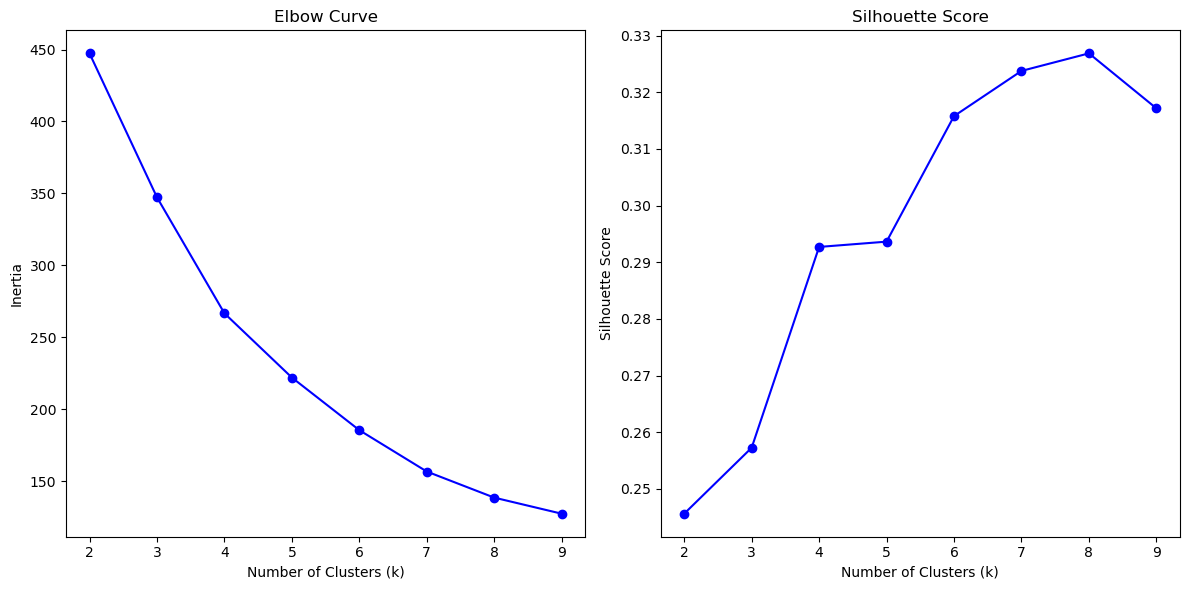

/Users/threshavoddiboina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Clustered Data (First 10 Customers):
   CustomerID  Recency  Frequency  Monetary  Cluster
0           1      103          2      4880        3
1           2      349          3      4215        1
2           3      271         49      2468        0
3           4      107         37      3947        3
4           5       72         49      4595        0
5           6      189         17      2801        1
6           7       21         49      1071        2
7           8      103          2      1266        1
8           9      122          2      2874        3
9          10      215         28      2082        1

Cluster Profiles:
         CustomerID     Recency  Frequency     Monetary
Cluster                                                
0        102.716981  246.094340  39.603774  3429.169811
1         94.968750  267.296875  15.968750  1886.984375
2        110.097561   90.512195  31.195122  1301.780488
3         96.761905   93.619048  19.571429  3894.476190


/Users/threshavoddiboina/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/threshavoddiboina/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/threshavoddiboina/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/threshavoddiboina/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Fu

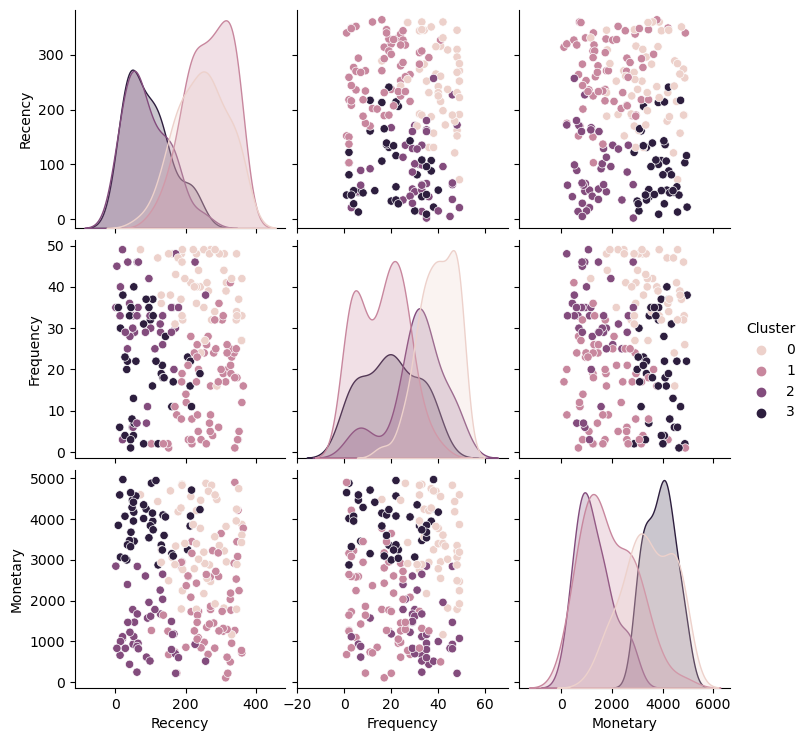

In [7]:
# Using the Elbow method to find the optimal number of clusters
inertia = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the elbow curve and silhouette scores
plt.figure(figsize=(12, 6))

# Elbow Curve (Inertia)
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# From the plots, choose the optimal number of clusters (let's assume it's 4)
optimal_k = 4

# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the clustered data
print("\nClustered Data (First 10 Customers):")
print(data.head(10))

# Cluster profiling: Average Recency, Frequency, and Monetary for each cluster
cluster_profile = data.groupby('Cluster').mean()
print("\nCluster Profiles:")
print(cluster_profile)

# Visualize the clusters using a pair plot (only for visualization, requires seaborn)
import seaborn as sns

sns.pairplot(data, hue='Cluster', vars=['Recency', 'Frequency', 'Monetary'])
plt.show()